<a href="https://colab.research.google.com/github/Nooraldin2001/Text-2-SQL/blob/main/Text2SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

After a Brainstorming with chatgpt this will the plan that I will conduct:
Here’s a step-by-step execution plan for your Text2SQL pipeline, integrating all the components from database setup to evaluation and optimization:

---

### **Phase 1: Data Preparation**
#### 1. **Create the SQLite Database**
- **Goal**: Combine all datasets (`employee_data.csv`, `recruitment_data.csv`, `training_and_development_data.csv`, `employee_engagement_survey_data.csv`) into an SQLite database with well-defined relationships.
- **Steps**:
  1. Load each dataset using pandas.
  2. Create a SQLite database and insert each dataset as a table.
  3. Define primary and foreign keys:
     - Example: `Employee ID` connects `employee_data`, `training_data`, and `engagement_data`.
  4. Verify relationships using SQL queries.

#### 2. **Generate the Evaluation Set**
- **Goal**: Build a set of 50–70 examples containing user questions and their corresponding SQL queries.
- **Steps**:
  1. Use the dataset schema to create realistic and varied questions.
  2. Write the SQL queries manually or use AI assistance for generation.
  3. Ensure examples cover:
     - Simple queries (e.g., SELECT specific columns).
     - Complex queries (e.g., JOIN, GROUP BY, AGGREGATE).
     - Edge cases (e.g., missing values, unmatched data).
  4. Split the examples into:
     - **Train Set**: ~60% for model fine-tuning.
     - **Dev Set**: ~20% for prompt optimization.
     - **Test Set**: ~20% for final evaluation.

---

### **Phase 2: Model Selection and Integration**
#### 3. **Select a Text2SQL Model**
- **Goal**: Choose a high-performing Text2SQL model from platforms like Hugging Face.
- **Steps**:
  1. Search for Text2SQL models on Hugging Face (e.g., `T5`, `SQLNet`, or `PICARD`).
  2. Compare models based on:
     - Accuracy on standard datasets (e.g., Spider).
     - Pretrained schema generalization.
     - Computational requirements.
  3. Download and set up the model.

#### 4. **Integrate the Model with SQLite**
- **Goal**: Create a Flask-based system to connect the model to the database.
- **Steps**:
  1. Set up a Flask app with two components:
     - **Frontend**: Accepts user questions.
     - **Backend**: Calls the Text2SQL model to generate queries and executes them against the SQLite database.
  2. Write endpoints for:
     - **Query generation**: Pass user input to the model.
     - **Query execution**: Run generated SQL queries and return results.

---

### **Phase 3: Evaluation and Optimization**
#### 5. **Evaluate Initial Model Performance**
- **Goal**: Assess how well the model generates accurate SQL queries.
- **Steps**:
  1. Evaluate on the test set using the **execution accuracy metric**:
     - Query correctness = The generated query’s result matches the gold query’s result.
  2. Handle near-misses:
     - Analyze logically close queries.
     - Use relaxed metrics like semantic equivalence or partial matching.

#### 6. **Optimize Prompts Using dspy**
- **Goal**: Improve the pipeline’s performance through better prompt engineering.
- **Steps**:
  1. Set up the **dspy framework**:
     - Provide it with the train and dev sets.
     - Define evaluation metrics (e.g., execution accuracy).
  2. Start with manual prompts (basic instructions for the model).
  3. Let dspy iteratively refine prompts using feedback from dev set performance.
  4. Monitor improvements and finalize the best-performing prompts.

---

### **Phase 4: Deployment**
#### 7. **Deploy the Text2SQL System**
- **Goal**: Create a functional application for end users.
- **Steps**:
  1. Containerize the Flask app using Docker for easy deployment.
  2. Test the system with real-world queries to ensure robustness.
  3. Deploy the system to a cloud platform (e.g., AWS, Azure).

---

### **Phase 5: Monitoring and Iteration**
#### 8. **Monitor System Performance**
- **Goal**: Ensure the system remains reliable and improves over time.
- **Steps**:
  1. Track execution accuracy metrics in production.
  2. Collect user feedback on generated queries.
  3. Periodically update the evaluation set and retrain/refine the model.

---

### **Summary of Key Steps**:
1. **Database Creation**: Structure the SQLite database with all datasets.
2. **Evaluation Set**: Generate and split the dataset into train, dev, and test sets.
3. **Model Setup**: Choose, download, and integrate a Text2SQL model.
4. **System Development**: Build a Flask app for user interaction and query execution.
5. **Evaluation**: Measure model performance and refine prompts using dspy.
6. **Deployment**: Deploy the system and monitor its performance.

This plan ensures you tackle the project systematically, from data preparation to deployment and optimization. Let me know if you’d like detailed guidance on any specific step!

In [ ]:
import kagglehub
import pandas as pd
import sqlite3
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

I am creating the database first then populating it because sql lite doesn't allow tables modfication

In [ ]:
# Connect to SQLite database (creates file if it doesn't exist)
conn = sqlite3.connect("company_data.db")

# Create a cursor object to execute SQL commands
cursor = conn.cursor()

# Define SQL commands as a string
sql_script = """
-- Employee Data
CREATE TABLE employee_data (
    employee_id INTEGER PRIMARY KEY,
    first_name TEXT,
    last_name TEXT,
    start_date DATE,
    exit_date DATE,
    title TEXT,
    supervisor TEXT,
    email TEXT,
    business_unit TEXT,
    employee_status TEXT,
    employee_type TEXT,
    pay_zone TEXT,
    employee_classification_type TEXT,
    termination_type TEXT,
    termination_description TEXT,
    department_type TEXT,
    division_description TEXT,
    dob DATE,
    state TEXT,
    job_function TEXT,
    gender TEXT,
    location TEXT,
    race_ethnicity TEXT,
    marital_status TEXT,
    performance_score TEXT,
    current_employee_rating TEXT
);

-- Training/Development Data
CREATE TABLE training_and_development_data (
    training_id INTEGER PRIMARY KEY AUTOINCREMENT,
    employee_id INTEGER,
    training_date DATE,
    training_program_name TEXT,
    training_type TEXT,
    training_outcome TEXT,
    location TEXT,
    trainer TEXT,
    training_duration_days INTEGER,
    training_cost REAL,
    FOREIGN KEY (employee_id) REFERENCES employee_data(employee_id)
);

-- Recruitment Data
CREATE TABLE recruitment_data (
    applicant_id INTEGER PRIMARY KEY,
    application_date DATE,
    first_name TEXT,
    last_name TEXT,
    gender TEXT,
    date_of_birth DATE,
    phone_number TEXT,
    email TEXT,
    address TEXT,
    city TEXT,
    state TEXT,
    zip_code TEXT,
    country TEXT,
    education_level TEXT,
    years_of_experience INTEGER,
    desired_salary REAL,
    job_title TEXT,
    status TEXT
);

-- Employee Engagement Survey Data
CREATE TABLE employee_engagement_survey_data (
    survey_id INTEGER PRIMARY KEY AUTOINCREMENT,
    employee_id INTEGER,
    survey_date DATE,
    engagement_score INTEGER,
    satisfaction_score INTEGER,
    work_life_balance_score INTEGER,
    FOREIGN KEY (employee_id) REFERENCES employee_data(employee_id)
);
"""

# Execute the SQL script
cursor.executescript(sql_script)

# Commit changes and close the connection
conn.commit()
conn.close()

print("Tables created successfully!")


Tables created successfully!


Verify Tables and Relationships

In [ ]:
# Reconnect to the database
conn = sqlite3.connect("company_data.db")
cursor = conn.cursor()

# Check tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables:", tables)

# Check foreign keys in a specific table
cursor.execute("PRAGMA foreign_key_list('training_and_development_data');")
print("Foreign keys in training_and_development_data:", cursor.fetchall())

conn.close()

Tables: [('employee_data',), ('training_and_development_data',), ('sqlite_sequence',), ('recruitment_data',), ('employee_engagement_survey_data',)]
Foreign keys in training_and_development_data: [(0, 0, 'employee_data', 'employee_id', 'employee_id', 'NO ACTION', 'NO ACTION', 'NONE')]


Know we had the database we just need to populate it

In [ ]:
# Download latest version
path = kagglehub.dataset_download("ravindrasinghrana/employeedataset")

print("Path to dataset files:", path)


100%|██████████| 520k/520k [00:00<00:00, 17.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ravindrasinghrana/employeedataset/versions/2


In [ ]:
cd /root/.cache/kagglehub/datasets/ravindrasinghrana/employeedataset/versions/2

/root/.cache/kagglehub/datasets/ravindrasinghrana/employeedataset/versions/2


In [ ]:
ls

employee_data.csv                    recruitment_data.csv
employee_engagement_survey_data.csv  training_and_development_data.csv


Loading data

In [ ]:
#Load data CSV file
employee_data = pd.read_csv("employee_data.csv")
training_data = pd.read_csv("training_and_development_data.csv")
recruitment_data = pd.read_csv("recruitment_data.csv")
survey_data = pd.read_csv("employee_engagement_survey_data.csv")

Handling columns missmatch

In [ ]:
print(employee_data.columns)
print(recruitment_data.columns)
print(survey_data.columns)
print(training_data.columns)

Index(['EmpID', 'FirstName', 'LastName', 'StartDate', 'ExitDate', 'Title',
       'Supervisor', 'ADEmail', 'BusinessUnit', 'EmployeeStatus',
       'EmployeeType', 'PayZone', 'EmployeeClassificationType',
       'TerminationType', 'TerminationDescription', 'DepartmentType',
       'Division', 'DOB', 'State', 'JobFunctionDescription', 'GenderCode',
       'LocationCode', 'RaceDesc', 'MaritalDesc', 'Performance Score',
       'Current Employee Rating'],
      dtype='object')
Index(['Applicant ID', 'Application Date', 'First Name', 'Last Name', 'Gender',
       'Date of Birth', 'Phone Number', 'Email', 'Address', 'City', 'State',
       'Zip Code', 'Country', 'Education Level', 'Years of Experience',
       'Desired Salary', 'Job Title', 'Status'],
      dtype='object')
Index(['Employee ID', 'Survey Date', 'Engagement Score', 'Satisfaction Score',
       'Work-Life Balance Score'],
      dtype='object')
Index(['Employee ID', 'Training Date', 'Training Program Name',
       'Training Type'

In [ ]:
# Rename columns for employee_data
employee_data = employee_data.rename(columns={
    "EmpID": "employee_id",
    "FirstName": "first_name",
    "LastName": "last_name",
    "StartDate": "start_date",
    "ExitDate": "exit_date",
    "Title": "title",
    "Supervisor": "supervisor",
    "ADEmail": "email",
    "BusinessUnit": "business_unit",
    "EmployeeStatus": "employee_status",
    "EmployeeType": "employee_type",
    "PayZone": "pay_zone",
    "EmployeeClassificationType": "employee_classification_type",
    "TerminationType": "termination_type",
    "TerminationDescription": "termination_description",
    "DepartmentType": "department_type",
    "Division": "division_description",
    "DOB": "dob",
    "State": "state",
    "JobFunctionDescription": "job_function",
    "GenderCode": "gender",
    "LocationCode": "location",
    "RaceDesc": "race_ethnicity",
    "MaritalDesc": "marital_status",
    "Performance Score": "performance_score",
    "Current Employee Rating": "current_employee_rating"
})

# Rename columns for training_and_development_data
training_data = training_data.rename(columns={
    "Employee ID": "employee_id",
    "Training Date": "training_date",
    "Training Program Name": "training_program_name",
    "Training Type": "training_type",
    "Training Outcome": "training_outcome",
    "Location": "location",
    "Trainer": "trainer",
    "Training Duration(Days)": "training_duration_days",
    "Training Cost": "training_cost"
})

# Rename columns for recruitment_data
recruitment_data = recruitment_data.rename(columns={
    "Applicant ID": "applicant_id",
    "Application Date": "application_date",
    "First Name": "first_name",
    "Last Name": "last_name",
    "Gender": "gender",
    "Date of Birth": "date_of_birth",
    "Phone Number": "phone_number",
    "Email": "email",
    "Address": "address",
    "City": "city",
    "State": "state",
    "Zip Code": "zip_code",
    "Country": "country",
    "Education Level": "education_level",
    "Years of Experience": "years_of_experience",
    "Desired Salary": "desired_salary",
    "Job Title": "job_title",
    "Status": "status"
})

# Rename columns for employee_engagement_survey_data
survey_data = survey_data.rename(columns={
    "Employee ID": "employee_id",
    "Survey Date": "survey_date",
    "Engagement Score": "engagement_score",
    "Satisfaction Score": "satisfaction_score",
    "Work-Life Balance Score": "work_life_balance_score"
})

In [ ]:
conn = sqlite3.connect('company_data.db')

# populate the dataset tables to the databae
employee_data.to_sql('employee_data', conn, if_exists='replace', index=False)
recruitment_data.to_sql('recruitment_data', conn, if_exists='replace', index=False)
survey_data.to_sql('employee_engagement_survey_data', conn, if_exists='replace', index=False)
training_data.to_sql('training_and_development_data', conn, if_exists='replace', index=False)
conn.close()

In [ ]:
conn = sqlite3.connect("company_data.db")
# Query the employee_data table
employee_data = pd.read_sql_query("SELECT * FROM employee_data LIMIT 5;", conn)
print(employee_data)
# Query the training_and_development_data table
training_data = pd.read_sql_query("SELECT * FROM training_and_development_data LIMIT 5;", conn)
print(training_data)
# Query the recruitment_data table
recruitment_data = pd.read_sql_query("SELECT * FROM recruitment_data LIMIT 5;", conn)
print(recruitment_data)
# Query the employee_engagement_survey_data table
engagement_data = pd.read_sql_query("SELECT * FROM employee_engagement_survey_data LIMIT 5;", conn)
print(engagement_data)
conn.close()

   employee_id first_name last_name start_date exit_date  \
0         3427      Uriah   Bridges  20-Sep-19      None   
1         3428      Paula     Small  11-Feb-23      None   
2         3429     Edward      Buck  10-Dec-18      None   
3         3430    Michael   Riordan  21-Jun-21      None   
4         3431    Jasmine     Onque  29-Jun-19      None   

                     title       supervisor                          email  \
0  Production Technician I     Peter Oneill    uriah.bridges@bilearner.com   
1  Production Technician I  Renee Mccormick      paula.small@bilearner.com   
2       Area Sales Manager   Crystal Walker      edward.buck@bilearner.com   
3       Area Sales Manager   Rebekah Wright  michael.riordan@bilearner.com   
4       Area Sales Manager        Jason Kim    jasmine.onque@bilearner.com   

  business_unit employee_status  ...  division_description         dob state  \
0          CCDR          Active  ...  Finance & Accounting  07-10-1969    MA   
1         

In [ ]:
# LLM_PRACTICES
data = [
    {
      "Prompt": "As part of the company's efforts to improve employee retention, develop a SQL query that provides an in-depth analysis of employee engagement and satisfaction. The query should offer the following insights:\n\n1. Engagement and Satisfaction Trends: Calculate the average engagement and satisfaction scores for employees grouped by department.\n2. High Performers: Identify employees with an engagement score above 90 and a satisfaction score above 85. Provide their names, job titles, and departments.\n3. Gender Representation: Determine the proportion of male, female, and non-binary employees in each department. Include department name, gender, and percentages.",
      "Response": """WITH AvgScores AS (
    SELECT
        department_type,
        AVG(engagement_score) AS avg_engagement,
        AVG(satisfaction_score) AS avg_satisfaction,
        NULL AS first_name,
        NULL AS last_name,
        NULL AS title,
        NULL AS gender,
        NULL AS percentage
    FROM employee_engagement_survey_data e
    JOIN employee_data d ON e.employee_id = d.employee_id
    GROUP BY department_type
),
HighPerformers AS (
    SELECT
        d.department_type,
        NULL AS avg_engagement,
        NULL AS avg_satisfaction,
        d.first_name,
        d.last_name,
        d.title,
        NULL AS gender,
        NULL AS percentage
    FROM employee_engagement_survey_data e
    JOIN employee_data d ON e.employee_id = d.employee_id
    WHERE e.engagement_score > 90 AND e.satisfaction_score > 85
),
GenderRepresentation AS (
    SELECT
        d.department_type,
        NULL AS avg_engagement,
        NULL AS avg_satisfaction,
        NULL AS first_name,
        NULL AS last_name,
        NULL AS title,
        d.gender,
        COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (PARTITION BY d.department_type) AS percentage
    FROM employee_data d
    GROUP BY d.department_type, d.gender
)
SELECT * FROM AvgScores
UNION ALL
SELECT * FROM HighPerformers
UNION ALL
SELECT * FROM GenderRepresentation;
"""
    },
    {
      "Prompt": "To optimize the company's training programs, create a SQL query that identifies key patterns in training data. The query should provide the following insights:\n\n1. Training Completion Rates: Calculate the percentage of employees who have completed their training programs in each business unit.\n2. High-Cost Training: Identify training programs that cost more than $5000. Provide their names, duration, and associated trainer.\n3. Correlation with Performance: Find employees who completed training in 'Leadership' and have a performance score of 'Excellent'. Provide their names, job titles, and business units.",
      "Response": """WITH CompletionRates AS (
    SELECT
        d.business_unit,
        COUNT(CASE WHEN t.training_outcome = 'Completed' THEN 1 END) * 100.0 / COUNT(*) AS completion_rate,
        NULL AS training_program_name,
        NULL AS training_duration_days,
        NULL AS trainer,
        NULL AS first_name,
        NULL AS last_name,
        NULL AS title
    FROM training_and_development_data t
    JOIN employee_data d ON t.employee_id = d.employee_id
    GROUP BY d.business_unit
),
HighCostTraining AS (
    SELECT
        NULL AS business_unit,
        NULL AS completion_rate,
        training_program_name,
        training_duration_days,
        trainer,
        NULL AS first_name,
        NULL AS last_name,
        NULL AS title
    FROM training_and_development_data
    WHERE training_cost > 5000
),
PerformanceCorrelation AS (
    SELECT
        d.business_unit,
        NULL AS completion_rate,
        NULL AS training_program_name,
        NULL AS training_duration_days,
        NULL AS trainer,
        d.first_name,
        d.last_name,
        d.title
    FROM training_and_development_data t
    JOIN employee_data d ON t.employee_id = d.employee_id
    WHERE t.training_program_name = 'Leadership' AND d.performance_score = 'Excellent'
)
SELECT * FROM CompletionRates
UNION ALL
SELECT * FROM HighCostTraining
UNION ALL
SELECT * FROM PerformanceCorrelation;
"""
    },
    {
      "Prompt": "To support recruitment strategy improvements, create a SQL query that provides insights into applicant data. The query should include the following:\n\n1. Education Distribution: Group applicants by their highest education level and count the number in each group.\n2. Experience Analysis: Calculate the average years of experience for applicants grouped by job title.\n3. Geographic Distribution: Count the number of applicants from each state.",
      "Response": "WITH EducationDistribution AS (\n    SELECT education_level, COUNT(*) AS count\n    FROM recruitment_data\n    GROUP BY education_level\n),\nExperienceAnalysis AS (\n    SELECT job_title, AVG(years_of_experience) AS avg_experience\n    FROM recruitment_data\n    GROUP BY job_title\n),\nGeographicDistribution AS (\n    SELECT state, COUNT(*) AS applicant_count\n    FROM recruitment_data\n    GROUP BY state\n)\nSELECT * FROM EducationDistribution\nUNION ALL\nSELECT * FROM ExperienceAnalysis\nUNION ALL\nSELECT * FROM GeographicDistribution;"
    },
    {
      "Prompt": """As part of the company's workforce analysis, create a SQL query to explore the distribution and performance of employees. The query should include the following insights:
                    1. Performance Distribution: Calculate the average performance score for each employee type (Full-time, Part-time, Contract).
                    2. Termination Analysis: Identify the number of employees terminated by each termination type.
                    3. Regional Performance: Determine the average performance score of employees grouped by state.""",
      "Response": """WITH PerformanceDistribution AS (
                     SELECT employee_type, AVG(performance_score) AS avg_performance
                     FROM employee_data
                     GROUP BY employee_type
                     ),
                     TerminationAnalysis AS (
                         SELECT termination_type, COUNT(*) AS termination_count
                         FROM employee_data
                         GROUP BY termination_type
                     ),
                     RegionalPerformance AS (
                         SELECT state, AVG(performance_score) AS avg_performance
                         FROM employee_data
                         GROUP BY state
                     )
                     SELECT * FROM PerformanceDistribution
                     UNION ALL
                     SELECT * FROM TerminationAnalysis
                     UNION ALL
                     SELECT * FROM RegionalPerformance;"""
    },
    {
      "Prompt": """To assist in evaluating training investments, generate a SQL query that examines the effectiveness and cost distribution of training programs. Include the following:
                1. Training Effectiveness: Calculate the percentage of employees who completed their training programs by training type.
                2. Costly Programs: Identify training programs that exceeded a cost threshold of $7000. Include program name, cost, and trainer.
                3. Departmental Training: Determine the total training cost for each department.""",
        "Response": """WITH TrainingEffectiveness AS (
    SELECT
        training_type,
        COUNT(CASE WHEN training_outcome = 'Completed' THEN 1 END) * 100.0 / COUNT(*) AS completion_rate,
        NULL AS training_program_name,
        NULL AS training_cost,
        NULL AS trainer,
        NULL AS department_type,
        NULL AS total_cost
    FROM training_and_development_data
    GROUP BY training_type
),
CostlyPrograms AS (
    SELECT
        NULL AS training_type,
        NULL AS completion_rate,
        training_program_name,
        training_cost,
        trainer,
        NULL AS department_type,
        NULL AS total_cost
    FROM training_and_development_data
    WHERE training_cost > 7000
),
DepartmentalTraining AS (
    SELECT
        NULL AS training_type,
        NULL AS completion_rate,
        NULL AS training_program_name,
        NULL AS training_cost,
        NULL AS trainer,
        d.department_type,
        SUM(t.training_cost) AS total_cost
    FROM training_and_development_data t
    JOIN employee_data d ON t.employee_id = d.employee_id
    GROUP BY d.department_type
)
SELECT * FROM TrainingEffectiveness
UNION ALL
SELECT * FROM CostlyPrograms
UNION ALL
SELECT * FROM DepartmentalTraining;
"""
    },
    {
      "Prompt": """To improve work-life balance strategies, generate a SQL query that analyzes survey data. Include the following:
                1. Work-Life Balance Trends: Calculate the average work-life balance score for employees in each business unit.
                2. High Satisfaction Employees: Identify employees with a satisfaction score above 90. Provide their names, job titles, and business units.
                3. Correlation Analysis: Compare the average engagement score of employees with a work-life balance score below 50 versus those above 80.""",
      "Response": """WITH WorkLifeBalanceTrends AS (
    SELECT
        business_unit,
        AVG(work_life_balance_score) AS avg_balance,
        NULL AS first_name,
        NULL AS last_name,
        NULL AS title,
        NULL AS balance_group,
        NULL AS avg_engagement
    FROM employee_engagement_survey_data e
    JOIN employee_data d ON e.employee_id = d.employee_id
    GROUP BY business_unit
),
HighSatisfactionEmployees AS (
    SELECT
        d.business_unit,
        NULL AS avg_balance,
        d.first_name,
        d.last_name,
        d.title,
        NULL AS balance_group,
        NULL AS avg_engagement
    FROM employee_engagement_survey_data e
    JOIN employee_data d ON e.employee_id = d.employee_id
    WHERE e.satisfaction_score > 90
),
CorrelationAnalysis AS (
    SELECT
        NULL AS business_unit,
        NULL AS avg_balance,
        NULL AS first_name,
        NULL AS last_name,
        NULL AS title,
        CASE WHEN work_life_balance_score < 50 THEN 'Low' ELSE 'High' END AS balance_group,
        AVG(engagement_score) AS avg_engagement
    FROM employee_engagement_survey_data
    GROUP BY balance_group
)
SELECT * FROM WorkLifeBalanceTrends
UNION ALL
SELECT * FROM HighSatisfactionEmployees
UNION ALL
SELECT * FROM CorrelationAnalysis;
"""
    },
    {
      "Prompt": """To streamline recruitment efforts, create a SQL query that evaluates applicant trends and preferences. Include the following:
                1. Application Trends: Count the number of applications received each month in the last year.
                2. Preferred Roles: Identify the top 5 job titles with the highest number of applicants. Include the count of applicants for each.
                3. Education Insights: Calculate the average years of experience for applicants grouped by their highest education level.""",
      "Response": """WITH ApplicationTrends AS (
    SELECT strftime('%Y-%m', application_date) AS application_month, COUNT(*) AS count
    FROM recruitment_data
    WHERE application_date >= date('now', '-1 year')
    GROUP BY application_month
    ),
    PreferredRoles AS (
        SELECT job_title, COUNT(*) AS applicant_count
        FROM recruitment_data
        GROUP BY job_title
        ORDER BY applicant_count DESC
        LIMIT 5
    ),
    EducationInsights AS (
        SELECT education_level, AVG(years_of_experience) AS avg_experience
        FROM recruitment_data
        GROUP BY education_level
    )
    SELECT * FROM ApplicationTrends
    UNION ALL
    SELECT * FROM PreferredRoles
    UNION ALL
    SELECT * FROM EducationInsights;"""
    },
    {
      "Prompt": """To evaluate employee engagement in different business units, create a SQL query that provides the following insights:
            1. Engagement by Unit: Calculate the average engagement score for each business unit.
            2. Top Performers: Identify employees with engagement scores in the top 10% across all business units. Include their names and job titles.
            3. Unit Satisfaction: Determine the average satisfaction score for employees in each business unit.""",
      "Response": """WITH EngagementByUnit AS (
    SELECT business_unit, AVG(engagement_score) AS avg_engagement
    FROM employee_engagement_survey_data e
    JOIN employee_data d ON e.employee_id = d.employee_id
    GROUP BY business_unit
    ),
    TopPerformers AS (
        SELECT d.first_name, d.last_name, d.title
        FROM employee_engagement_survey_data e
        JOIN employee_data d ON e.employee_id = d.employee_id
        WHERE e.engagement_score > (SELECT PERCENTILE_CONT(0.9) WITHIN GROUP (ORDER BY engagement_score) FROM employee_engagement_survey_data)
    ),
    UnitSatisfaction AS (
        SELECT business_unit, AVG(satisfaction_score) AS avg_satisfaction
        FROM employee_engagement_survey_data e
        JOIN employee_data d ON e.employee_id = d.employee_id
        GROUP BY business_unit
    )
    SELECT * FROM EngagementByUnit
    UNION ALL
    SELECT * FROM TopPerformers
    UNION ALL
    SELECT * FROM UnitSatisfaction;"""
    },
    {
      "Prompt": """To enhance training program evaluation, create a SQL query that provides insights into training outcomes. Include the following:
            1. Completion Rates by Program: Calculate the completion rate for each training program.
            2. High-Cost Trainings: Identify training programs that exceed $10,000 in total cost. Include their names and the number of attendees.
            3. Impactful Trainings: Find employees who completed the 'Advanced Technical Skills' training and achieved an engagement score above 85. Include their names and job titles.""",
      "Response": """WITH CompletionRatesByProgram AS (
            SELECT training_program_name, COUNT(CASE WHEN training_outcome = 'Completed' THEN 1 END) * 100.0 / COUNT(*) AS completion_rate
            FROM training_and_development_data
            GROUP BY training_program_name
            ),
            HighCostTrainings AS (
                SELECT training_program_name, SUM(training_cost) AS total_cost, COUNT(employee_id) AS attendees
                FROM training_and_development_data
                WHERE training_cost > 10000
                GROUP BY training_program_name
            ),
            ImpactfulTrainings AS (
                SELECT d.first_name, d.last_name, d.title
                FROM training_and_development_data t
                JOIN employee_data d ON t.employee_id = d.employee_id
                JOIN employee_engagement_survey_data e ON d.employee_id = e.employee_id
                WHERE t.training_program_name = 'Advanced Technical Skills' AND e.engagement_score > 85
            )
            SELECT * FROM CompletionRatesByProgram
            UNION ALL
            SELECT * FROM HighCostTrainings
            UNION ALL
            SELECT * FROM ImpactfulTrainings;"""
    },
    {
      "Prompt": """To analyze employee performance and retention, create a SQL query to identify key patterns. Include the following insights:
            1. Retention Rates: Calculate the percentage of employees retained over the last three years.
            2. Top Performers by Department: Identify the top 3 employees with the highest performance scores in each department. Include their names and scores.
            3. Exit Trends: Count the number of employees who exited the company each year.""",
      "Response": """WITH RetentionRates AS (
            SELECT strftime('%Y', start_date) AS start_year,
                   COUNT(CASE WHEN exit_date IS NULL THEN 1 END) * 100.0 / COUNT(*) AS retention_rate
            FROM employee_data
            WHERE strftime('%Y', start_date) >= strftime('%Y', 'now', '-3 years')
            GROUP BY start_year
            ),
            TopPerformers AS (
                SELECT department_type, first_name, last_name, performance_score
                FROM (
                    SELECT d.department_type, d.first_name, d.last_name, d.performance_score,
                           RANK() OVER (PARTITION BY d.department_type ORDER BY d.performance_score DESC) AS rank
                    FROM employee_data d
                )
                WHERE rank <= 3
            ),
            ExitTrends AS (
                SELECT strftime('%Y', exit_date) AS exit_year, COUNT(*) AS exit_count
                FROM employee_data
                WHERE exit_date IS NOT NULL
                GROUP BY exit_year
            )
            SELECT * FROM RetentionRates
            UNION ALL
            SELECT * FROM TopPerformers
            UNION ALL
            SELECT * FROM ExitTrends;"""
    },
    {
      "Prompt": """To evaluate diversity initiatives, create a SQL query that analyzes employee demographics. Include the following:
        1. Gender Distribution: Calculate the percentage of employees by gender in each department.
        2. Ethnicity Representation: Count the number of employees from each ethnicity in each business unit.
        3. Salary Averages: Determine the average pay zone for employees grouped by gender and ethnicity.""",
      "Response": """WITH GenderDistribution AS (
            SELECT department_type, gender,
                   COUNT(*) * 100.0 / SUM(COUNT(*)) OVER (PARTITION BY department_type) AS percentage
            FROM employee_data
            GROUP BY department_type, gender
            ),
            EthnicityRepresentation AS (
                SELECT business_unit, race_ethnicity, COUNT(*) AS count
                FROM employee_data
                GROUP BY business_unit, race_ethnicity
            ),
            SalaryAverages AS (
                SELECT gender, race_ethnicity, AVG(pay_zone) AS avg_pay_zone
                FROM employee_data
                GROUP BY gender, race_ethnicity
            )
            SELECT * FROM GenderDistribution
            UNION ALL
            SELECT * FROM EthnicityRepresentation
            UNION ALL
            SELECT * FROM SalaryAverages;"""
    },
    {
      "Prompt": """To monitor employee growth, create a SQL query that tracks changes in performance scores over time. Include the following:
            1. Yearly Performance Growth: Calculate the average performance score for each year across all employees.
            2. Top 5 Improving Employees: Identify the top 5 employees with the largest improvement in performance score from the previous year. Include their names and scores.
            3. Department Growth Trends: Determine the yearly average performance score for each department.""",
      "Response": """WITH YearlyPerformanceGrowth AS (
            SELECT strftime('%Y', start_date) AS year, AVG(performance_score) AS avg_performance
            FROM employee_data
            GROUP BY year
            ),
            TopImprovingEmployees AS (
                SELECT d.first_name, d.last_name,
                       (e.performance_score - LAG(e.performance_score) OVER (PARTITION BY e.employee_id ORDER BY e.survey_date)) AS improvement
                FROM employee_engagement_survey_data e
                JOIN employee_data d ON e.employee_id = d.employee_id
                ORDER BY improvement DESC
                LIMIT 5
            ),
            DepartmentGrowthTrends AS (
                SELECT d.department_type, strftime('%Y', start_date) AS year, AVG(e.performance_score) AS avg_score
                FROM employee_engagement_survey_data e
                JOIN employee_data d ON e.employee_id = d.employee_id
                GROUP BY d.department_type, year
            )
            SELECT * FROM YearlyPerformanceGrowth
            UNION ALL
            SELECT * FROM TopImprovingEmployees
            UNION ALL
            SELECT * FROM DepartmentGrowthTrends;"""
    },
    {
      "Prompt": """To evaluate employee attendance in training programs, create a SQL query that provides insights into training participation. Include the following:
            1. Training Attendance: Count the number of employees who attended each training program.
            2. Department Participation: Calculate the percentage of employees in each department who have attended at least one training program.
            3. High Attendance Programs: Identify training programs with more than 50 attendees. Include the program name and number of attendees.""",
      "Response": """WITH TrainingAttendance AS (
            SELECT training_program_name, COUNT(employee_id) AS attendee_count
            FROM training_and_development_data
            GROUP BY training_program_name
            ),
            DepartmentParticipation AS (
                SELECT d.department_type,
                       COUNT(DISTINCT t.employee_id) * 100.0 / COUNT(DISTINCT d.employee_id) AS participation_rate
                FROM employee_data d
                LEFT JOIN training_and_development_data t ON d.employee_id = t.employee_id
                GROUP BY d.department_type
            ),
            HighAttendancePrograms AS (
                SELECT training_program_name, COUNT(employee_id) AS attendee_count
                FROM training_and_development_data
                GROUP BY training_program_name
                HAVING attendee_count > 50
            )
            SELECT * FROM TrainingAttendance
            UNION ALL
            SELECT * FROM DepartmentParticipation
            UNION ALL
            SELECT * FROM HighAttendancePrograms;"""
    },
    {
      "Prompt": "To identify active employees, write a SQL query that lists all employees currently employed. Include their names and job titles.",
      "Response": "SELECT first_name, last_name, title\nFROM employee_data\nWHERE employee_status = 'Active';"
    },
    {
      "Prompt": "To evaluate training participation, write a SQL query that counts the number of employees who completed training programs.",
      "Response": "SELECT COUNT(*) AS completed_trainings\nFROM training_and_development_data\nWHERE training_outcome = 'Completed';"
    },
    {
      "Prompt": "To understand recruitment trends, write a SQL query that calculates the number of applications received for each job title.",
      "Response": "SELECT job_title, COUNT(*) AS application_count\nFROM recruitment_data\nGROUP BY job_title;"
    },
    {
      "Prompt": "To analyze diversity, write a SQL query that calculates the percentage of employees by gender.",
      "Response": "SELECT gender, COUNT(*) * 100.0 / SUM(COUNT(*)) OVER () AS percentage\nFROM employee_data\nGROUP BY gender;"
    },
    {
      "Prompt": "To evaluate engagement scores, write a SQL query that finds the average engagement score for each department.",
      "Response": "SELECT department_type, AVG(engagement_score) AS avg_engagement\nFROM employee_engagement_survey_data e\nJOIN employee_data d ON e.employee_id = d.employee_id\nGROUP BY department_type;"
    },
    {
      "Prompt": "To track employee growth, write a SQL query that lists employees who have been with the company for over 5 years. Include their names and start dates.",
      "Response": "SELECT first_name, last_name, start_date\nFROM employee_data\nWHERE julianday('now') - julianday(start_date) > 5 * 365;"
    },
    {
      "Prompt": "To improve satisfaction strategies, write a SQL query that lists employees with a satisfaction score above 80. Include their names and departments.",
      "Response": "SELECT d.first_name, d.last_name, d.department_type\nFROM employee_engagement_survey_data e\nJOIN employee_data d ON e.employee_id = d.employee_id\nWHERE e.satisfaction_score > 80;"
    },
    {
      "Prompt": "To evaluate training costs, write a SQL query that calculates the total cost of training programs for each department.",
      "Response": "SELECT d.department_type, SUM(t.training_cost) AS total_training_cost\nFROM training_and_development_data t\nJOIN employee_data d ON t.employee_id = d.employee_id\nGROUP BY d.department_type;"
    },
    {
      "Prompt": "To analyze recruitment success, write a SQL query that counts the number of applicants selected for each job title.",
      "Response": "SELECT job_title, COUNT(*) AS selected_count\nFROM recruitment_data\nWHERE status = 'Selected'\nGROUP BY job_title;"
    },
    {
      "Prompt": "To track work-life balance, write a SQL query that finds the average work-life balance score for employees in each business unit.",
      "Response": "SELECT business_unit, AVG(work_life_balance_score) AS avg_balance\nFROM employee_engagement_survey_data e\nJOIN employee_data d ON e.employee_id = d.employee_id\nGROUP BY business_unit;"
    },
    {
      "Prompt": "To monitor exit trends, write a SQL query that counts the number of employees who exited the company each year.",
      "Response": "SELECT strftime('%Y', exit_date) AS exit_year, COUNT(*) AS exit_count\nFROM employee_data\nWHERE exit_date IS NOT NULL\nGROUP BY exit_year;"
    },
    {
      "Prompt": "To analyze performance, write a SQL query that identifies the top 3 employees with the highest performance scores in each department.",
      "Response": "SELECT department_type, first_name, last_name, performance_score\nFROM (\n    SELECT department_type, first_name, last_name, performance_score,\n           RANK() OVER (PARTITION BY department_type ORDER BY performance_score DESC) AS rank\n    FROM employee_data\n)\nWHERE rank <= 3;"
    },
    {
      "Prompt": "To analyze department retention, write a SQL query that calculates the retention rate for each department.",
      "Response": "SELECT department_type, \n           COUNT(CASE WHEN employee_status = 'Active' THEN 1 END) * 100.0 / COUNT(*) AS retention_rate\nFROM employee_data\nGROUP BY department_type;"
    },
    {
      "Prompt": "To understand salary distribution, write a SQL query that calculates the average pay zone for each job title.",
      "Response": "SELECT title, AVG(pay_zone) AS avg_pay_zone\nFROM employee_data\nGROUP BY title;"
    },
    {
      "Prompt": "To find inactive employees, write a SQL query that lists employees who are no longer employed. Include their names and termination types.",
      "Response": "SELECT first_name, last_name, termination_type\nFROM employee_data\nWHERE employee_status = 'Terminated';"
    },
    {
      "Prompt": "To assess training impact, write a SQL query that lists employees who completed 'Leadership' training and their current performance scores.",
      "Response": "SELECT d.first_name, d.last_name, d.performance_score\nFROM training_and_development_data t\nJOIN employee_data d ON t.employee_id = d.employee_id\nWHERE t.training_program_name = 'Leadership' AND t.training_outcome = 'Completed';"
    },
    {
      "Prompt": "To analyze job function diversity, write a SQL query that counts the number of employees in each job function.",
      "Response": "SELECT job_function, COUNT(*) AS employee_count\nFROM employee_data\nGROUP BY job_function;"
    },
    {
      "Prompt": "To evaluate applicant experience, write a SQL query that calculates the average years of experience for applicants grouped by state.",
      "Response": "SELECT state, AVG(years_of_experience) AS avg_experience\nFROM recruitment_data\nGROUP BY state;"
    },
    {
      "Prompt": "To understand gender representation in management, write a SQL query that calculates the percentage of male and female employees in management roles.",
      "Response": "SELECT gender, \n           COUNT(*) * 100.0 / SUM(COUNT(*)) OVER () AS percentage\nFROM employee_data\nWHERE title LIKE '%Manager%'\nGROUP BY gender;"
    },
    {
      "Prompt": "To analyze employee engagement trends, write a SQL query that calculates the average engagement score for each department over the last two years.",
      "Response": "SELECT department_type, AVG(engagement_score) AS avg_engagement\nFROM employee_engagement_survey_data e\nJOIN employee_data d ON e.employee_id = d.employee_id\nWHERE e.survey_date >= date('now', '-2 years')\nGROUP BY department_type;"
    },
    {
      "Prompt": "To evaluate training program outcomes, write a SQL query that calculates the completion rate and average cost of training programs grouped by training type.",
      "Response": "SELECT training_type, \n           COUNT(CASE WHEN training_outcome = 'Completed' THEN 1 END) * 100.0 / COUNT(*) AS completion_rate,\n           AVG(training_cost) AS avg_cost\nFROM training_and_development_data\nGROUP BY training_type;"
    },
    {
      "Prompt": "To understand recruitment efficiency, write a SQL query that calculates the average time to hire for selected applicants grouped by job title.",
      "Response": "SELECT job_title, \n           AVG(julianday(selection_date) - julianday(application_date)) AS avg_time_to_hire\nFROM recruitment_data\nWHERE status = 'Selected'\nGROUP BY job_title;"
    },
    {
      "Prompt": "To assess employee distribution, write a SQL query that calculates the number of employees in each business unit and their average years of service.",
      "Response": "SELECT business_unit, COUNT(*) AS employee_count, \n           AVG(julianday('now') - julianday(start_date)) / 365.0 AS avg_years_of_service\nFROM employee_data\nGROUP BY business_unit;"
    },
    {
      "Prompt": "To analyze performance trends, write a SQL query that calculates the average performance score for each department and filters for departments with an average score above 85.",
      "Response": "SELECT department_type, AVG(performance_score) AS avg_performance\nFROM employee_data\nGROUP BY department_type\nHAVING avg_performance > 85;"
    },
    {
      "Prompt": "To understand training participation, write a SQL query that calculates the percentage of employees in each department who attended at least one training program.",
      "Response": "SELECT d.department_type, \n           COUNT(DISTINCT t.employee_id) * 100.0 / COUNT(DISTINCT d.employee_id) AS participation_rate\nFROM employee_data d\nLEFT JOIN training_and_development_data t ON d.employee_id = t.employee_id\nGROUP BY d.department_type;"
    },
    {
      "Prompt": "To analyze hiring trends, write a SQL query that calculates the number of applications received monthly for each job title over the past year.",
      "Response": "SELECT strftime('%Y-%m', application_date) AS application_month, job_title, COUNT(*) AS application_count\nFROM recruitment_data\nWHERE application_date >= date('now', '-1 year')\nGROUP BY application_month, job_title;"
    },
    {
      "Prompt": "To evaluate gender diversity in management roles, write a SQL query that calculates the percentage of male and female employees in managerial positions.",
      "Response": "SELECT gender, \n           COUNT(*) * 100.0 / SUM(COUNT(*)) OVER () AS percentage\nFROM employee_data\nWHERE title LIKE '%Manager%'\nGROUP BY gender;"
    },
    {
      "Prompt": "To assess training cost efficiency, write a SQL query that calculates the total cost and average cost per attendee for each training program.",
      "Response": "SELECT training_program_name, \n           SUM(training_cost) AS total_cost,\n           SUM(training_cost) / COUNT(employee_id) AS avg_cost_per_attendee\nFROM training_and_development_data\nGROUP BY training_program_name;"
    },
    {
      "Prompt": "To assess high-performing employees, write a SQL query that identifies the top 5 employees with the highest engagement scores in each business unit.",
      "Response": "SELECT business_unit, first_name, last_name, engagement_score\nFROM (\n    SELECT d.business_unit, e.engagement_score, d.first_name, d.last_name,\n           RANK() OVER (PARTITION BY d.business_unit ORDER BY e.engagement_score DESC) AS rank\n    FROM employee_engagement_survey_data e\n    JOIN employee_data d ON e.employee_id = d.employee_id\n)\nWHERE rank <= 5;"
    },
    {
      "Prompt": "To evaluate work-life balance, write a SQL query that calculates the average work-life balance score for each state.",
      "Response": "SELECT state, AVG(work_life_balance_score) AS avg_balance\nFROM employee_engagement_survey_data e\nJOIN employee_data d ON e.employee_id = d.employee_id\nGROUP BY state;"
    },
]

df = pd.DataFrame(data)
df.head()

,Prompt,Response
0,As part of the company's efforts to improve em...,WITH AvgScores AS (\n SELECT \n depa...
1,"To optimize the company's training programs, c...",WITH CompletionRates AS (\n SELECT \n ...
2,"To support recruitment strategy improvements, ...",WITH EducationDistribution AS (\n SELECT ed...
3,"As part of the company's workforce analysis, c...",WITH PerformanceDistribution AS (\n ...
4,"To assist in evaluating training investments, ...",WITH TrainingEffectiveness AS (\n SELECT \n...


In [ ]:
df.count()

,0
Prompt,43
Response,43


In [ ]:
# Iterate through each query in the responses and execute it to validate the prompts
conn = sqlite3.connect('company_data.db')
for item in data:
    query = item['Response']
    try:
        result = pd.read_sql_query(query, conn)
        print(f"Prompt: {item['Prompt']}\nResult:\n{result}\n")
    except Exception as e:
        print(f"Prompt: {item['Prompt']}\nError: {e}\n")

# Close the connection
conn.close()

Prompt: As part of the company's efforts to improve employee retention, develop a SQL query that provides an in-depth analysis of employee engagement and satisfaction. The query should offer the following insights:

1. Engagement and Satisfaction Trends: Calculate the average engagement and satisfaction scores for employees grouped by department.
2. High Performers: Identify employees with an engagement score above 90 and a satisfaction score above 85. Provide their names, job titles, and departments.
3. Gender Representation: Determine the proportion of male, female, and non-binary employees in each department. Include department name, gender, and percentages.
Result:
         department_type  avg_engagement  avg_satisfaction first_name  \
0          Admin Offices        2.925000          2.512500       None   
1       Executive Office        3.375000          3.083333       None   
2                  IT/IS        3.025581          3.009302       None   
3      Production             

In [ ]:
# Shuffle the dataset
shuffled_data = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Add a 'Type' column to categorize by SQL statement type
shuffled_data['Type'] = shuffled_data['Response'].str.split().str[0].str.upper()

In [ ]:
shuffled_data.head()

,Prompt,Response,Type
0,"To understand training participation, write a ...","SELECT d.department_type, \n COUNT(D...",SELECT
1,"To analyze performance, write a SQL query that...","SELECT department_type, first_name, last_name,...",SELECT
2,"To analyze department retention, write a SQL q...","SELECT department_type, \n COUNT(CAS...",SELECT
3,"To analyze performance trends, write a SQL que...","SELECT department_type, AVG(performance_score)...",SELECT
4,"To understand recruitment efficiency, write a ...","SELECT job_title, \n AVG(julianday(s...",SELECT


In [ ]:
# Split the data into Train, Dev, and Test sets ensuring diversity by SQL type
train_set, dev_set, test_set = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

def split_group(group):
    train, temp = train_test_split(group, test_size=0.4, random_state=42)
    dev, test = train_test_split(temp, test_size=0.5, random_state=42)
    return train, dev, test

for _, group in shuffled_data.groupby('Type'):
    train, dev, test = split_group(group)
    train_set = pd.concat([train_set, train], ignore_index=True)
    dev_set = pd.concat([dev_set, dev], ignore_index=True)
    test_set = pd.concat([test_set, test], ignore_index=True)

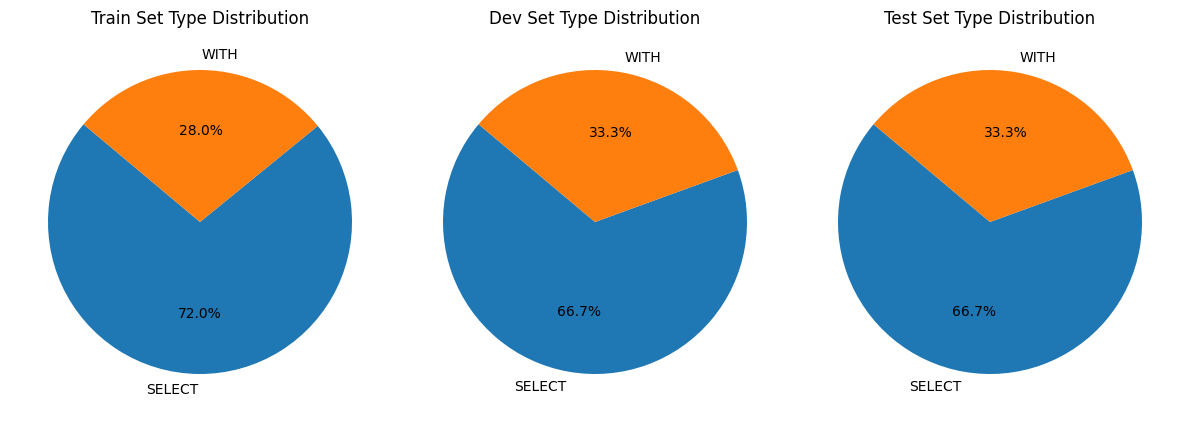

In [ ]:
# Calculate the distribution of Types in each set
train_type_distribution = train_set['Type'].value_counts()
dev_type_distribution = dev_set['Type'].value_counts()
test_type_distribution = test_set['Type'].value_counts()

# Plot pie charts for each set
plt.figure(figsize=(12, 8))

# Train set
plt.subplot(1, 3, 1)
train_type_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Train Set Type Distribution')
plt.ylabel('')

# Dev set
plt.subplot(1, 3, 2)
dev_type_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Dev Set Type Distribution')
plt.ylabel('')

# Test set
plt.subplot(1, 3, 3)
test_type_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Test Set Type Distribution')
plt.ylabel('')

plt.tight_layout()
plt.show()